In [55]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import extract_methods
import methods
import seaborn as sb

#Libraries to create the multiclass model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
#Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()

import music
from numpy.linalg import norm

In [2]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [99]:
dataset=pd.read_csv("mood_music_dataset.csv")
dataset.shape

dataset.head(50)

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.137000,0.73000,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.018900,0.83200,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.913000,0.13900,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.089000,0.43800,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.001710,0.93200,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,Energetic
5,A Burden to Bear,A Burden to Bear,Emmanuelle Rimbaud,67DOFCrkcQaLp5yhzF8Y8N,2020-07-31,27,129410,0.394,0.995000,0.04750,0.955000,0.1050,0.1720,-26.432,0.0720,71.241,6,5,Calm
6,A La Plage,A La Plage,Ron Adelaar,79NmiFAgcXUIVDGfCWDdWF,2020-08-07,29,141888,0.504,0.994000,0.05840,0.956000,0.1150,0.5530,-20.461,0.0516,134.209,5,4,Calm
7,A Little Less Conversation - JXL Radio Edit Remix,Elvis 75 - Good Rockin' Tonight,Elvis Presley,4l2hnfUx0esSbITQa7iJt0,2009-12-28,1,211173,0.586,0.000155,0.93500,0.277000,0.1590,0.5800,-9.386,0.0482,114.997,4,4,Happy
8,A Place for My Head,Hybrid Theory (Bonus Edition),Linkin Park,5rAxhWcgFng3s570sGO2F8,2000-10-24,68,184640,0.603,0.014400,0.90800,0.000000,0.6710,0.4570,-5.254,0.1840,133.063,11,4,Energetic
9,ATTACK,A Beautiful Lie + 30 Seconds To Mars,Thirty Seconds To Mars,6QxTWEvzcJljVZaeTzuHF1,2007-05-15,0,189200,0.331,0.003440,0.87600,0.000835,0.7320,0.2990,-1.894,0.0603,175.009,5,4,Energetic


In [52]:
data=pd.read_csv('songs_mood.csv')
data['mood_feature']=data[['valence','energy']].values.tolist()
data.head()

,id,genre,track_name,artist_name,valence,energy,danceability,acousticness,instrumentalness,liveness,loudness,speechiness,tempo,mood_feature
0,3fCJRE4P1uU8dcqEW5mnM6,acoustic,Staple It Together,Jack Johnson,0.786,0.794,0.816,0.00644,0.006680,0.0791,-6.095,0.0486,94.023,"[0.786, 0.794]"
1,7z7fquRFQFXt4Dj7ouWETq,acoustic,Hey There Delilah,Plain White T's,0.304,0.373,0.661,0.84000,0.000000,0.1060,-8.169,0.0281,103.999,"[0.304, 0.373]"
2,4PTPbE3HvhxB9z3SYMBfz6,acoustic,"No Light, No Light - MTV Unplugged, 2012",Florence + The Machine,0.156,0.231,0.383,0.83400,0.000000,0.7030,-10.257,0.0396,95.670,"[0.156, 0.231]"
3,3DDGhkxq3FeUorZppSgeLE,acoustic,Somewhere Only We Know,Lily Allen,0.278,0.286,0.314,0.93500,0.025800,0.0999,-10.191,0.0350,172.021,"[0.278, 0.286]"
4,5LkAwO0AkY6Z3M4bCadu4r,acoustic,Freak On A Leash - Feat. Amy Lee,Korn,0.169,0.776,0.441,0.23800,0.000004,0.9230,-5.787,0.1970,109.672,"[0.169, 0.776]"


In [12]:
#important attributes are extracted for the mood 
features = dataset.columns[6:-3]
X1= MinMaxScaler().fit_transform(dataset[features])
X2 = np.array(dataset[features])
Y = dataset['mood']


In [13]:
#encode categorical to numeric values
label=LabelEncoder()
label.fit(Y)
Y_=label.transform(Y)


In [14]:
#train and test the data by splitting the data 80% and 20%
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y_,test_size=0.2,random_state=15,shuffle=True)


In [15]:
Y_category=pd.DataFrame({'mood':dataset['mood'].tolist(),'Encoded Values':Y_}).sort_values(['Encoded Values'],ascending=True).drop_duplicates()

Y_category

,mood,Encoded Values
685,Calm,0
489,Energetic,1
590,Happy,2
671,Sad,3


In [16]:
def keras_model():
    model=Sequential()
    model.add(Dense(units=8,input_dim=10,activation='relu'))#layer with 8 nodes,input of 4 dim with relu function
    model.add(Dense(4,activation='softmax'))#layer with output 3 and softmax function
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [17]:
#Configure the model
classifier = KerasClassifier(build_fn=keras_model,epochs=200,batch_size=200,verbose=0)

C:\Users\Ankit\AppData\Local\Temp\ipykernel_16808\1182086753.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn=keras_model,epochs=200,batch_size=200,verbose=0)


In [20]:
folds = KFold(n_splits=10,shuffle=True,random_state=False)
res= cross_val_score(classifier,X1,Y_,cv=folds)
print("Accuracy: %.2f%% (%.2f%%)" % (res.mean()*100,res.std()*100))

Accuracy: 78.28% (2.70%)


In [22]:
classifier.fit(X_train,Y_train)
pred_Y = classifier.predict(X_test)

In [71]:
def predict_mood(song_id):
    #Join the model and the scaler in a Pipeline
    model_pipeline= Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=keras_model,epochs=200,
                                                                             batch_size=200,verbose=0))])
    #Fit the Pipeline
    model_pipeline.fit(X2,Y_)

    #Obtain the features of the song
    preds = extract_methods.song_features(song_id)
    

    #Predict the features of the song
    results = model_pipeline.predict(preds)

    mood = np.array(Y_category['mood'][Y_category['Encoded Values']==int(results)])
    return print(f"The song is a {mood[0]} song"),print(mood[0])
    
    

In [102]:
song_name='Are You Gonna Be My Girl'
track_id=extract_methods.song_id(song_name)
track_id

array(['305WCRhhS10XUcH6AEwZk6'], dtype=object)

In [104]:
predict_mood(track_id[0])

C:\Users\Ankit\AppData\Local\Temp\ipykernel_16808\2226081639.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_pipeline= Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=keras_model,epochs=200,


[[ 2.13800e+05  6.13000e-01  1.48000e-03  9.53000e-01  5.82000e-04
   1.52000e-01  5.37000e-01 -3.43500e+00  8.55000e-02  1.05046e+02]]


C:\Users\Ankit\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


The song is a Happy song
Happy


(None, None)

In [30]:
log_in = music.authenticate()

In [77]:
def recommendation(song_name,login_id=log_in,num=10):
    track_id=extract_methods.song_id(song_name)
    #print(track_id)
    audio_features=extract_methods.song_features(track_id[0])
    mood_features = np.array([audio_features[0][6], audio_features[0][3]])
    data["distance"] = data["mood_feature"].apply(lambda x: norm(mood_features-np.array(x)))
    sort_data = data.sort_values(by = "distance", ascending = True,inplace=False,axis=0,ignore_index=False)
    sort_data = sort_data[sort_data["id"] != track_id[0]]
    return sort_data.iloc[:num]
   

In [46]:
audio=extract_methods.song_features(track_id[0])
audio[0][6],audio[0][3]

(0.206, 0.0848)

In [105]:
happy_df=recommendation(song_name,log_in)

In [93]:
angry_df=recommendation(song_name,log_in)

In [78]:
calm_df=recommendation(song_name,log_in)

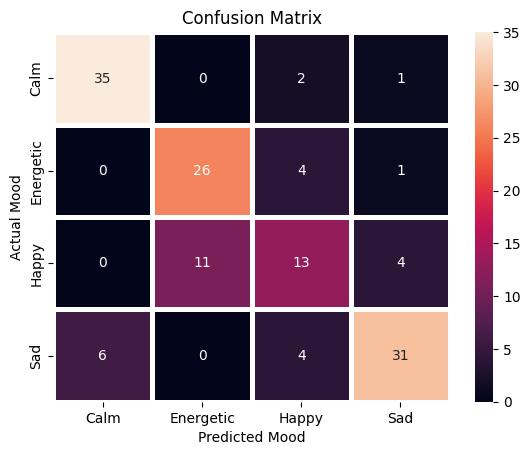

Accuracy Score 0.7608695652173914


In [63]:
#accuracy check
matrix=confusion_matrix(Y_test,pred_Y)
ax=plt.subplot()
sb.heatmap(matrix,annot=True,linewidths=2.5,ax=ax)
label=Y_category['mood']
ax.set_xlabel('Predicted Mood')
ax.set_ylabel('Actual Mood')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)

plt.show()
print('Accuracy Score',accuracy_score(Y_test,pred_Y))

In [67]:
sad_df.to_csv('sad_songs.csv', encoding='utf-8', index=False)

In [94]:
calm_df.to_csv('neutral_songs.csv', encoding='utf-8', index=False)

In [95]:
angry_df.to_csv('angry_songs.csv', encoding='utf-8', index=False)

In [106]:
happy_df.to_csv('happy_songs.csv', encoding='utf-8', index=False)

In [108]:
sad_df,angry_df,calm_df,happy_df

(                          id        genre  \
 5455  1OzSfjFW08DTD51XoNnog7  soundtracks   
 5008  1hVQx6bg4uKPljAUkNjpY2          sad   
 961   3dObajAARX9gtSsSxcd9Tc    classical   
 3341  6TkNbkFSdxJXm0AoHAgGDd         jazz   
 5175  4bovXC1BdSlbG1Q8uJqBYk   show-tunes   
 4004  0i9N0w8cKyNmAuuRS8XMOY        opera   
 5181  3QacjulTJIwUpczeGQWJKc   show-tunes   
 2681  0qdXXDFEIXJDkZhcBPqPz9     holidays   
 4037  6jI4Y84P9r6TtR9FpLRZZy        opera   
 981   4HEoHSEH8cEYGJBzOgXqX3    classical   
 
                                              track_name  \
 5455  I'm Not That Girl - From "Wicked" Original Bro...   
 5008                                          Gone Away   
 961                                    make black white   
 3341     He's Younger Than You Are - From "Alfie" Score   
 5175                               I Miss the Mountains   
 4004  Bellini: La sonnambula, Act 1: "Compagne... te...   
 5181  The Mirror (Angel of Music) - Single Album Ver...   
 2681       